<a href="https://colab.research.google.com/github/stacykeago/Turing-project/blob/main/Turing_project_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

1. Define the question


2. Metric for success


3. Experimental design taken
Import libraries
Load  dataset
clean the data 
Exploratory data analysis techniques

4. Appropriateness of available data to answer the given question. To get the data:
        *   Visit https://drive.google.com/file/d/1TMOK9yFDm6nJ2PAC-unBbrG-tR5THJ90/view?usp=sharing 
        download.
                 


# DATA CLEANING

## Import libraries

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt       # for data visualization
import seaborn as sns                       # for statistical data visualization
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

## Load Datasets

In [ ]:
# load the dataset
alco = pd.read_csv('/content/cardio_alco.csv', sep = ";")
alco.head()

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [ ]:
# load dataset 2
base = pd.read_csv('/content/cardio_base.csv')
base.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [ ]:
#Load dataset 3
data = pd.read_csv('/content/covid_data.csv')
data.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


## Dataset summary info

In [ ]:
#Check for dataset info
alco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      56903 non-null  int64
 1   alco    56903 non-null  int64
dtypes: int64(2)
memory usage: 889.2 KB


In [ ]:
#Check for dataset info
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


In [ ]:
#Check for dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


## Numeric Features Description

In [ ]:
# Count, mean, standard deviation, minimum, maximum,
alco.describe().T

,count,mean,std,min,25%,50%,75%,max
id,56903.0,48472.162065,30994.121701,44.0,20401.0,40763.0,77109.5,99954.0
alco,56903.0,0.053442,0.224915,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Count, mean, standard deviation, minimum, maximum,
base.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [ ]:
# Count, mean, standard deviation, minimum, maximum,
data.describe().T

,count,mean,std,min,25%,50%,75%,max
new_cases,23082.0,6.247693e+02,5.517309e+03,-2461.000,0.000,3.000,5.500000e+01,1.335100e+05
new_deaths,23082.0,3.562906e+01,3.309869e+02,-1918.000,0.000,0.000,1.000000e+00,1.052000e+04
population,23018.0,1.037003e+08,6.716897e+08,809.000,2083380.000,9449321.000,3.346920e+07,7.794799e+09
aged_65_older_percent,20643.0,9.758570e+00,6.445662e+00,1.144,3.853,7.646,1.532200e+01,2.704900e+01
gdp_per_capita,20711.0,2.270838e+04,2.118783e+04,661.240,6426.674,15524.995,3.522008e+04,1.169356e+05
hospital_beds_per_thousand,19144.0,3.204687e+00,2.593700e+00,0.100,1.400,2.600,4.210000e+00,1.380000e+01


# Preprocessing data

### Column list

In [ ]:
alco.columns

Index(['id', 'alco'], dtype='object')

In [ ]:
base.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'smoke'],
      dtype='object')

In [ ]:
data.columns

Index(['location', 'date', 'new_cases', 'new_deaths', 'population',
       'aged_65_older_percent', 'gdp_per_capita',
       'hospital_beds_per_thousand'],
      dtype='object')

###  Check for duplicates

In [ ]:
# check for duplicates
alco.duplicated().any()

False

In [ ]:
# check for duplicates
base.duplicated().any()

False

In [ ]:
# check for duplicates
data.duplicated().any()

False

### Check for unique

In [ ]:
# Check for unique values in each column
alco.nunique()

id      56903
alco        2
dtype: int64

In [ ]:
# Check for unique values in each column
base.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
smoke              2
dtype: int64

In [ ]:
# Check for unique values in each column
data.nunique()

location                       212
date                           163
new_cases                     2073
new_deaths                     634
population                     211
aged_65_older_percent          183
gdp_per_capita                 184
hospital_beds_per_thousand     100
dtype: int64

### Data types in each column

In [ ]:
# Check for data types in each column
alco.dtypes

id      int64
alco    int64
dtype: object

In [ ]:
# Check for data types in each column
base.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
smoke            int64
dtype: object

In [ ]:
# Check for data types in each column
data.dtypes

location                       object
date                           object
new_cases                       int64
new_deaths                      int64
population                    float64
aged_65_older_percent         float64
gdp_per_capita                float64
hospital_beds_per_thousand    float64
dtype: object

#### # Convert Date column to data type " Date" format

In [ ]:
# Convert Date column to data type " Date"
ttm['Date'] = pd.to_datetime(ttm.Date)
ttm.head()

### Check for null values

In [ ]:
#check for null
alco.isnull().sum()

id      0
alco    0
dtype: int64

In [ ]:
#check for null
base.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
dtype: int64

In [ ]:
#check for null
data.isnull().sum()

location                         0
date                             0
new_cases                        0
new_deaths                       0
population                      64
aged_65_older_percent         2439
gdp_per_capita                2371
hospital_beds_per_thousand    3938
dtype: int64

In [ ]:
#   Replace the null values
null_columns = ["population", "aged_65_older_percent", "gdp_per_capita", "hospital_beds_per_thousand"]
for col in null_columns :
  data[col].fillna(method='ffill', inplace=True)
  

In [ ]:
# confirm if all null values have been replaced
data.isna().sum()

location                      0
date                          0
new_cases                     0
new_deaths                    0
population                    0
aged_65_older_percent         0
gdp_per_capita                0
hospital_beds_per_thousand    0
dtype: int64

### Check for NA Values

In [ ]:
print("NA values:", alco.isna().values.any())

NA values: False


In [ ]:
print("NA values:", base.isna().values.any())

NA values: False


In [ ]:
print("NA values:", data.isna().values.any())

NA values: False


### Outliers

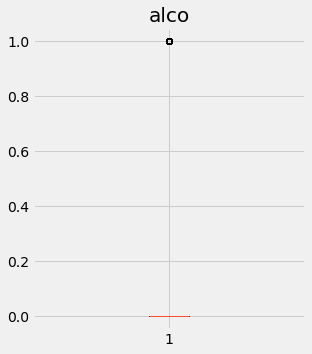

In [ ]:
alco_dict ={ 'alco':1}
plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in alco_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(alco[variable])
  plt.title(variable)

plt.show()

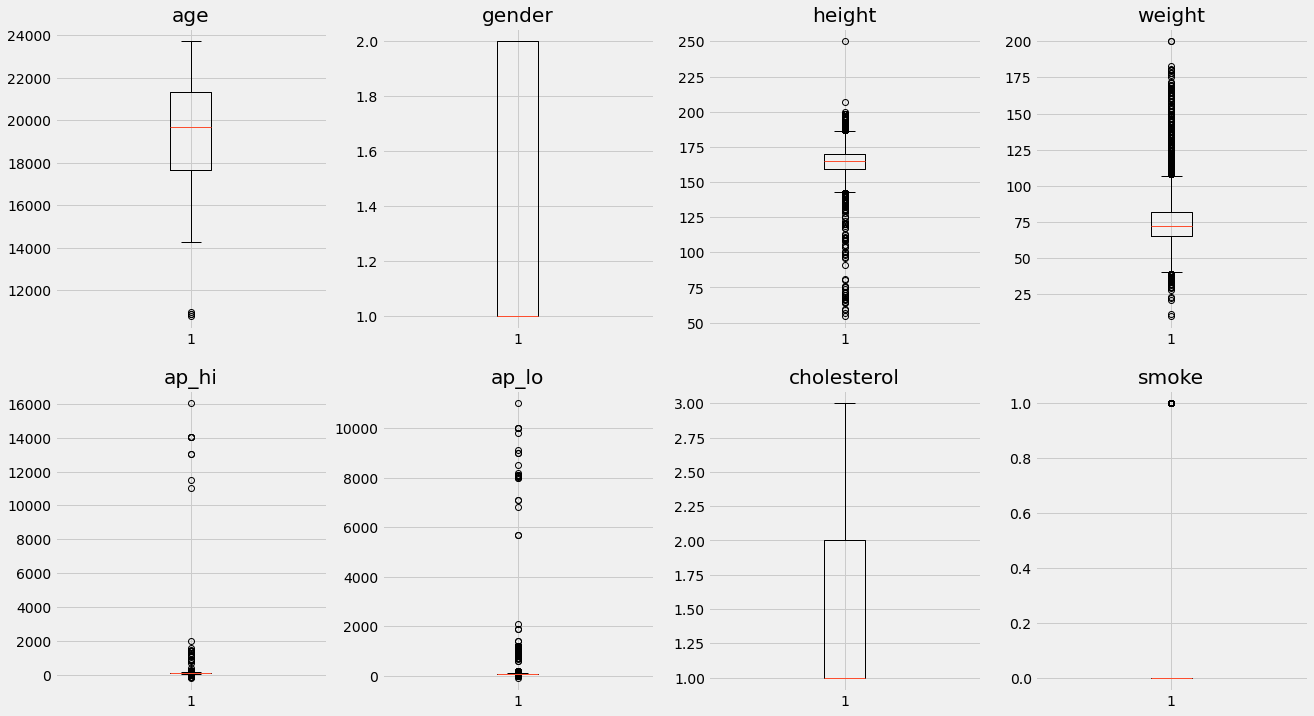

In [ ]:
#columns=  'id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'smoke'
base_dict ={ 'age':1, 'gender':2, 'height':3, 'weight':4, 'ap_hi':5, 'ap_lo':6, 'cholesterol':7, 'smoke':8}
plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in base_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(base[variable])
  plt.title(variable)

plt.show()

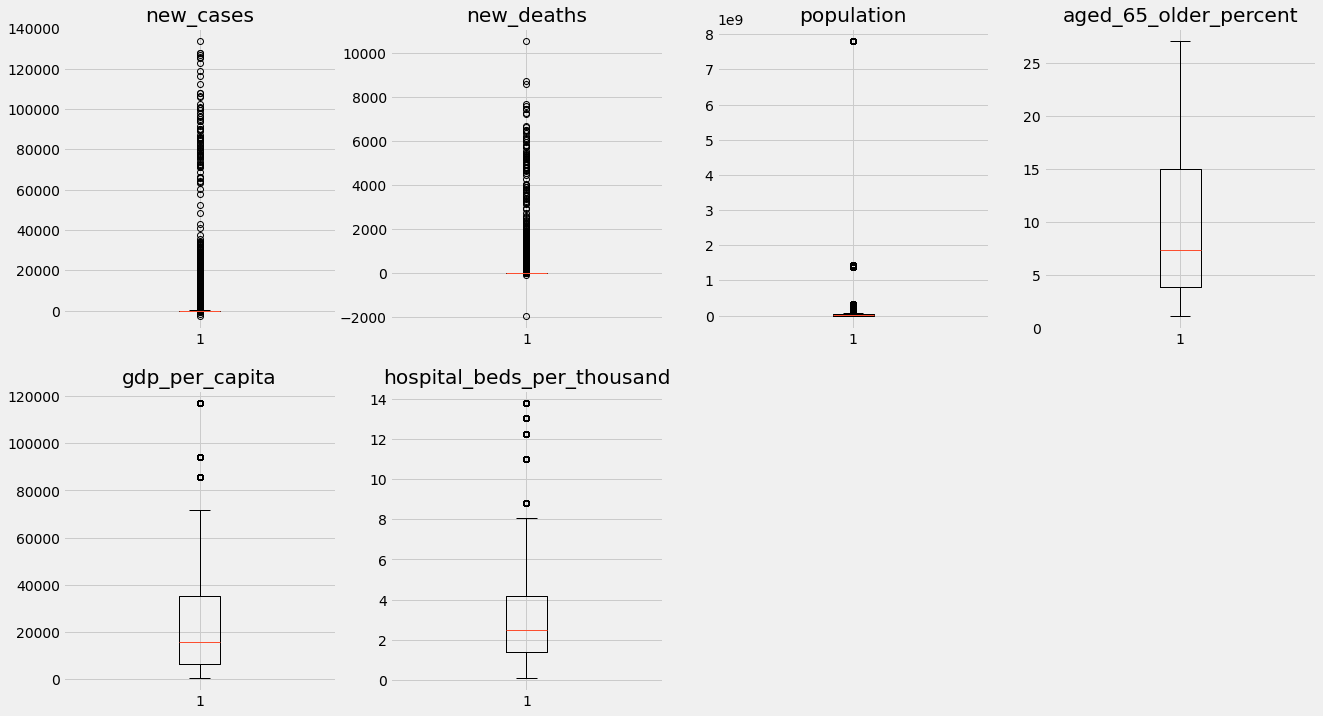

In [ ]:
#columns = 'location', 'date', 'new_cases', 'new_deaths', 'population','aged_65_older_percent', 'gdp_per_capita', 'hospital_beds_per_thousand']  
# create a dictionary with all numeric columns    
data_dict ={  'new_cases':1, 'new_deaths':2,
            'population':3,'aged_65_older_percent':4, 'gdp_per_capita':5, 'hospital_beds_per_thousand':}  
plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in data_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(data[variable])
  plt.title(variable)

plt.show()

# UNIVARIATE ANALYSIS

## Univariate analysis of "Base" Dataset

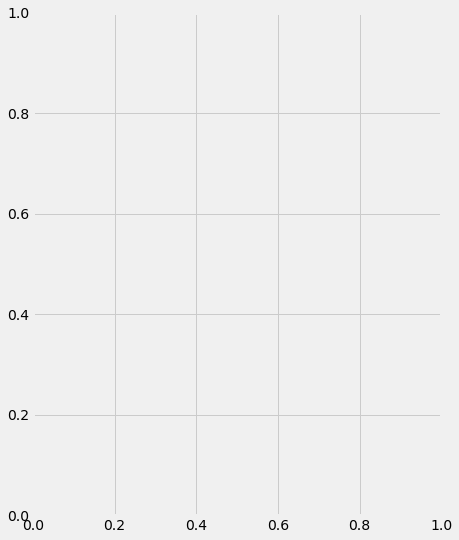

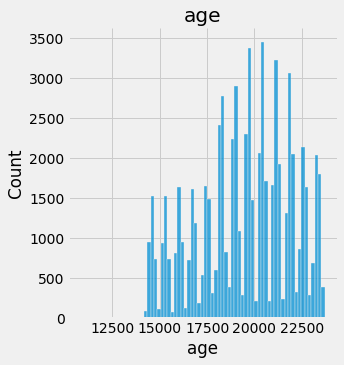

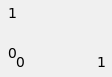

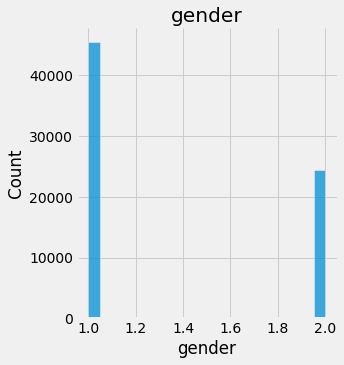

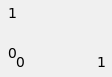

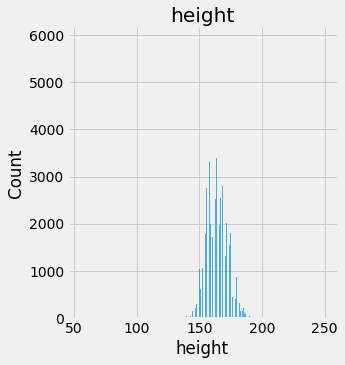

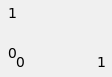

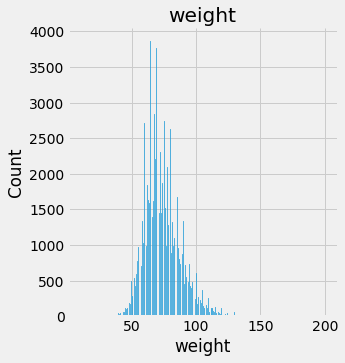

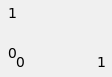

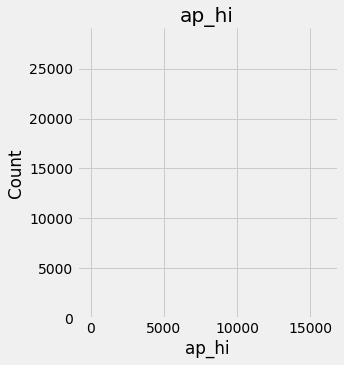

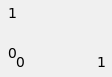

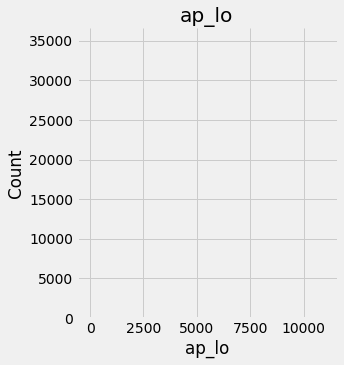

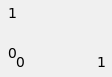

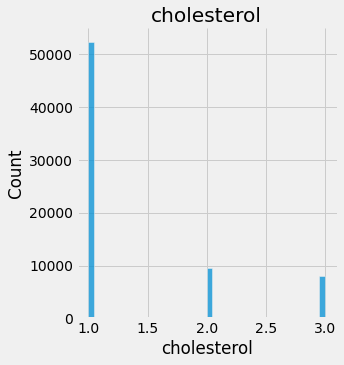

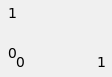

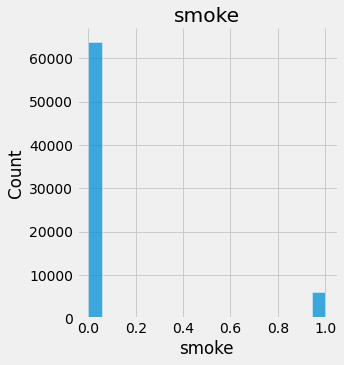

In [ ]:
base_dict ={ 'age':1, 'gender':2, 'height':3, 'weight':4, 'ap_hi':5, 'ap_lo':6, 'cholesterol':7, 'smoke':8}

# Ploting the univariate summaries and recording our observations
# plot histograms for all numeric columns
# we use the dictionary we had earlier on created

plt.figure(figsize = (30,50))
for variable,i in base_dict.items():
  plt.subplot(5,4,i)
  sns.displot(base[variable])
  plt.title(variable)
  plt.show()

## Univariate analysis of "Data" Dataset

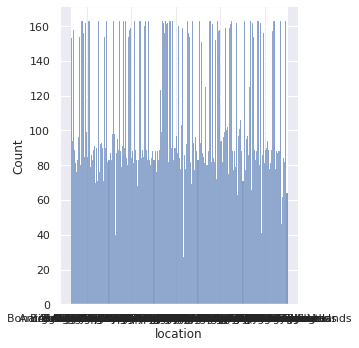

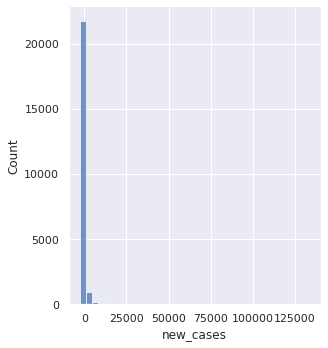

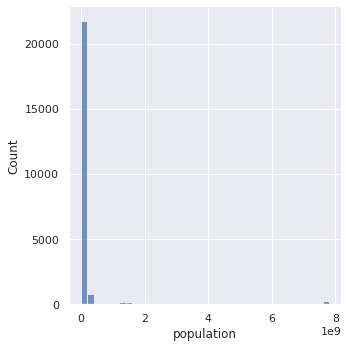

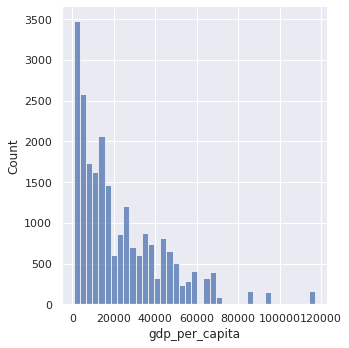

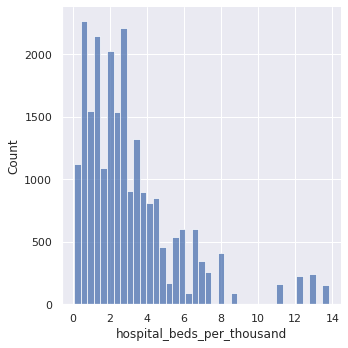

In [ ]:
# Univariate analysis of "Data" Dataset
#'location',  'new_cases', 'new_deaths', 'population','aged_65_older_percent', 'gdp_per_capita', 'hospital_beds_per_thousand
sns.displot(data.location.dropna(), kde=False, bins = 39);
sns.displot(data.new_cases.dropna(), kde=False, bins = 39);
sns.displot(data.population.dropna(), kde=False, bins = 39);
sns.displot(data.gdp_per_capita.dropna(), kde=False, bins = 39);
sns.displot(data.hospital_beds_per_thousand.dropna(), kde=False, bins = 39);


# BIVARIATE ANALYSIS

## Bivariate analysis of "Data" Dataset using Pair plot

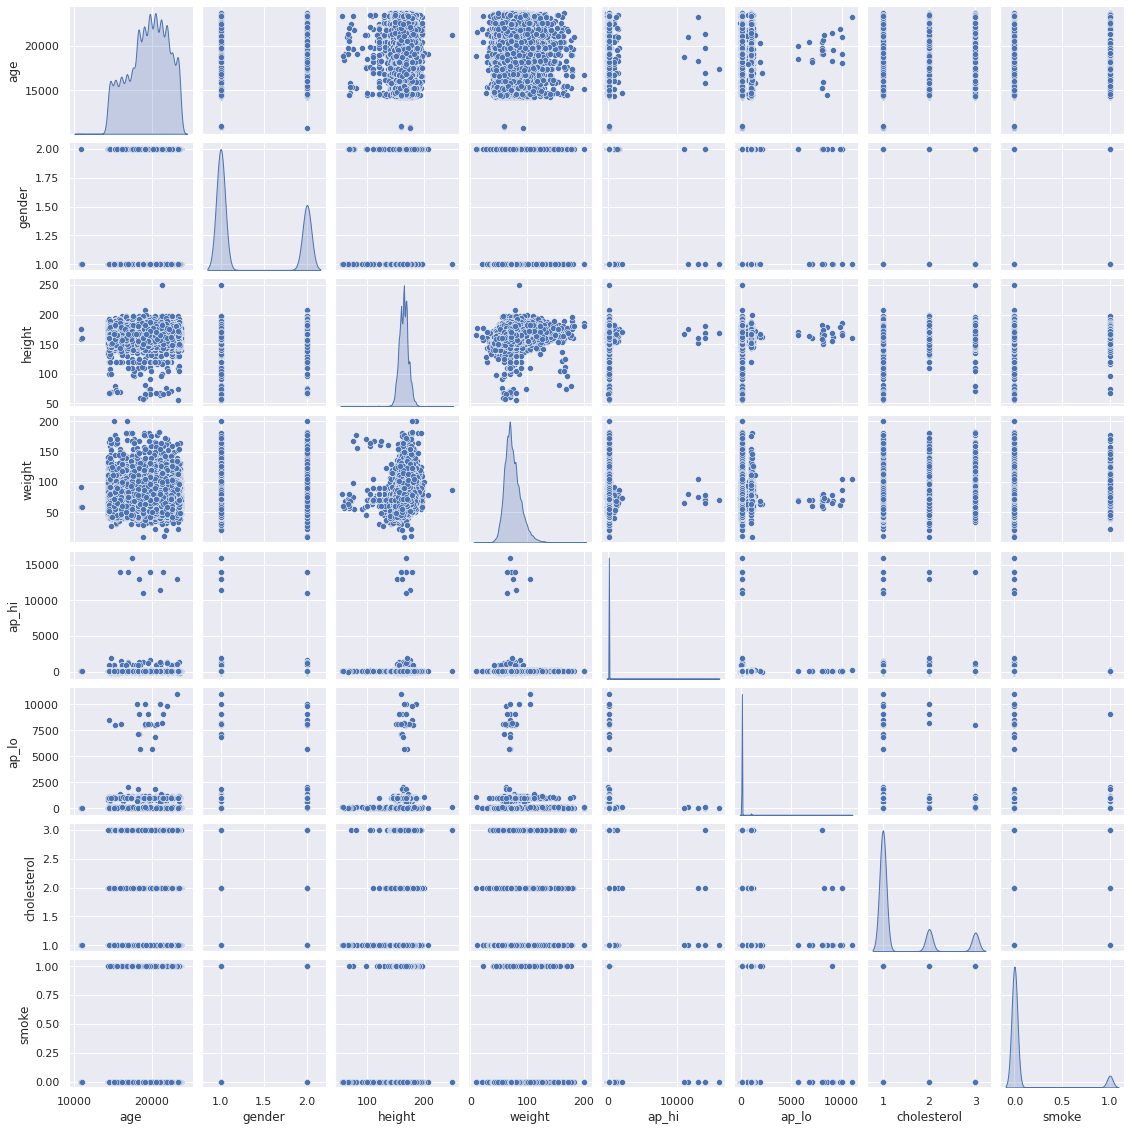

In [ ]:
# data columns = 'location', 'date', 'new_cases', 'new_deaths', 'population', 'aged_65_older_percent', 'gdp_per_capita', 'hospital_beds_per_thousand'
sns.set()
columns1 = [ 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'smoke']
sns.pairplot(base[columns1],height = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

## Bivariate analysis of Base Dataset

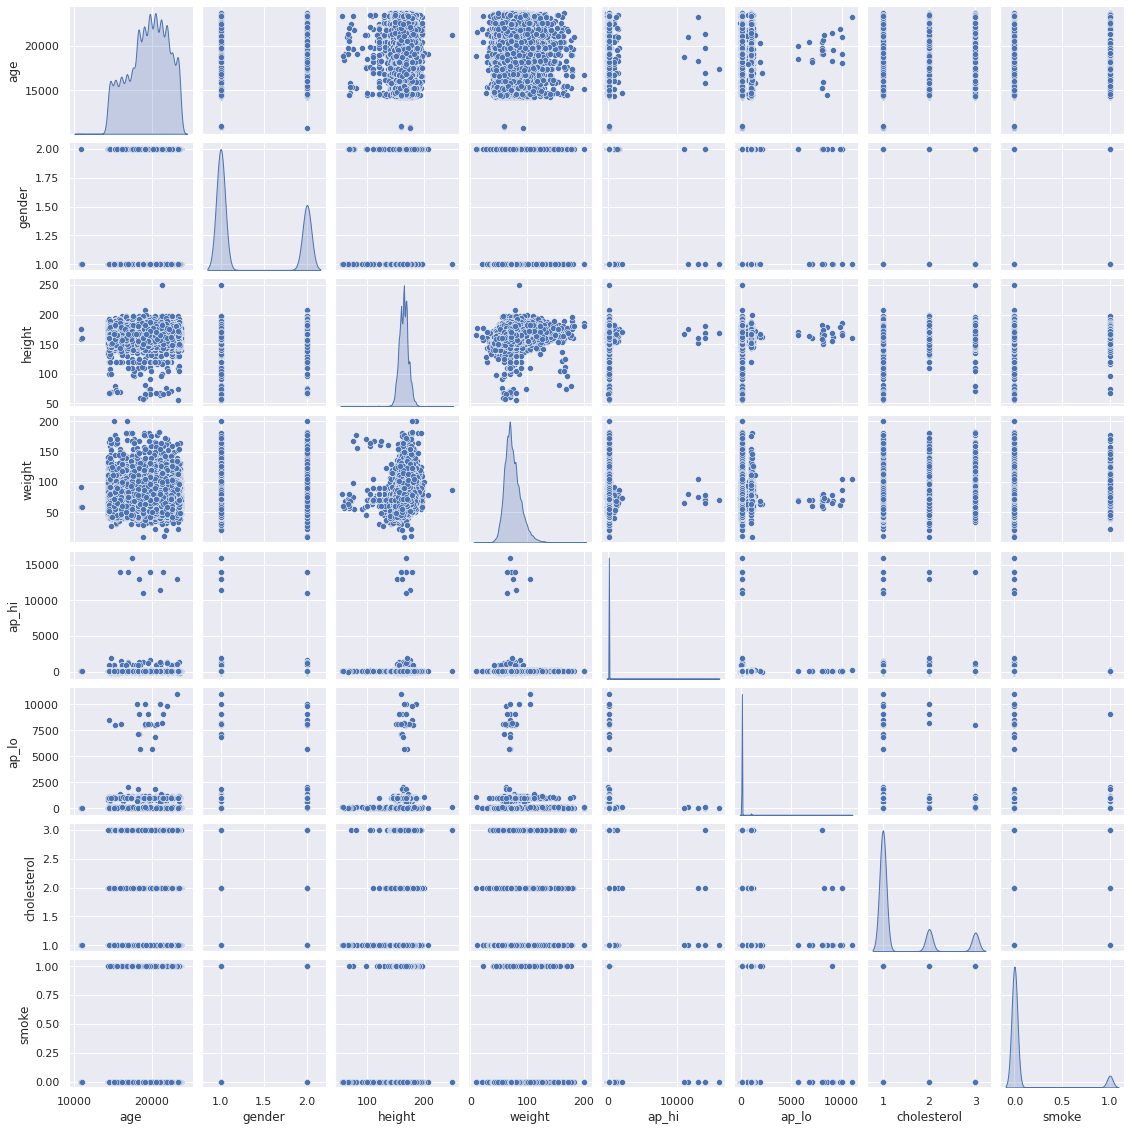

In [ ]:
# base columns = 'id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'smoke'
sns.set()
columns1 = [  'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'smoke']
sns.pairplot(base[columns1],height = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

# MULTIVARIATE ANALYSIS

## Data Correlation

In [ ]:
print(base.corr())

                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003457  0.003502 -0.003038 -0.001830  0.003356   
age          0.003457  1.000000 -0.022811 -0.081515  0.053684  0.020764   
gender       0.003502 -0.022811  1.000000  0.499033  0.155406  0.006005   
height      -0.003038 -0.081515  0.499033  1.000000  0.290968  0.005488   
weight      -0.001830  0.053684  0.155406  0.290968  1.000000  0.030702   
ap_hi        0.003356  0.020764  0.006005  0.005488  0.030702  1.000000   
ap_lo       -0.002529  0.017647  0.015254  0.006150  0.043710  0.016086   
cholesterol  0.006106  0.154424 -0.035821 -0.050226  0.141768  0.023778   
smoke       -0.003699 -0.047633  0.338135  0.187989  0.067780 -0.000922   

                ap_lo  cholesterol     smoke  
id          -0.002529     0.006106 -0.003699  
age          0.017647     0.154424 -0.047633  
gender       0.015254    -0.035821  0.338135  
height       0.006150    -0.050226  0.187989  
weight       0

In [ ]:
print(data.corr())

                            new_cases  new_deaths  population  \
new_cases                    1.000000    0.918490    0.561495   
new_deaths                   0.918490    1.000000    0.531564   
population                   0.561495    0.531564    1.000000   
aged_65_older_percent        0.018326    0.037970   -0.020446   
gdp_per_capita               0.010444    0.015878   -0.052785   
hospital_beds_per_thousand  -0.008219   -0.008529   -0.025697   

                            aged_65_older_percent  gdp_per_capita  \
new_cases                                0.018326        0.010444   
new_deaths                               0.037970        0.015878   
population                              -0.020446       -0.052785   
aged_65_older_percent                    1.000000        0.460072   
gdp_per_capita                           0.460072        1.000000   
hospital_beds_per_thousand               0.557186        0.180075   

                            hospital_beds_per_thousand  
new

## Heatmap plot for base dataset

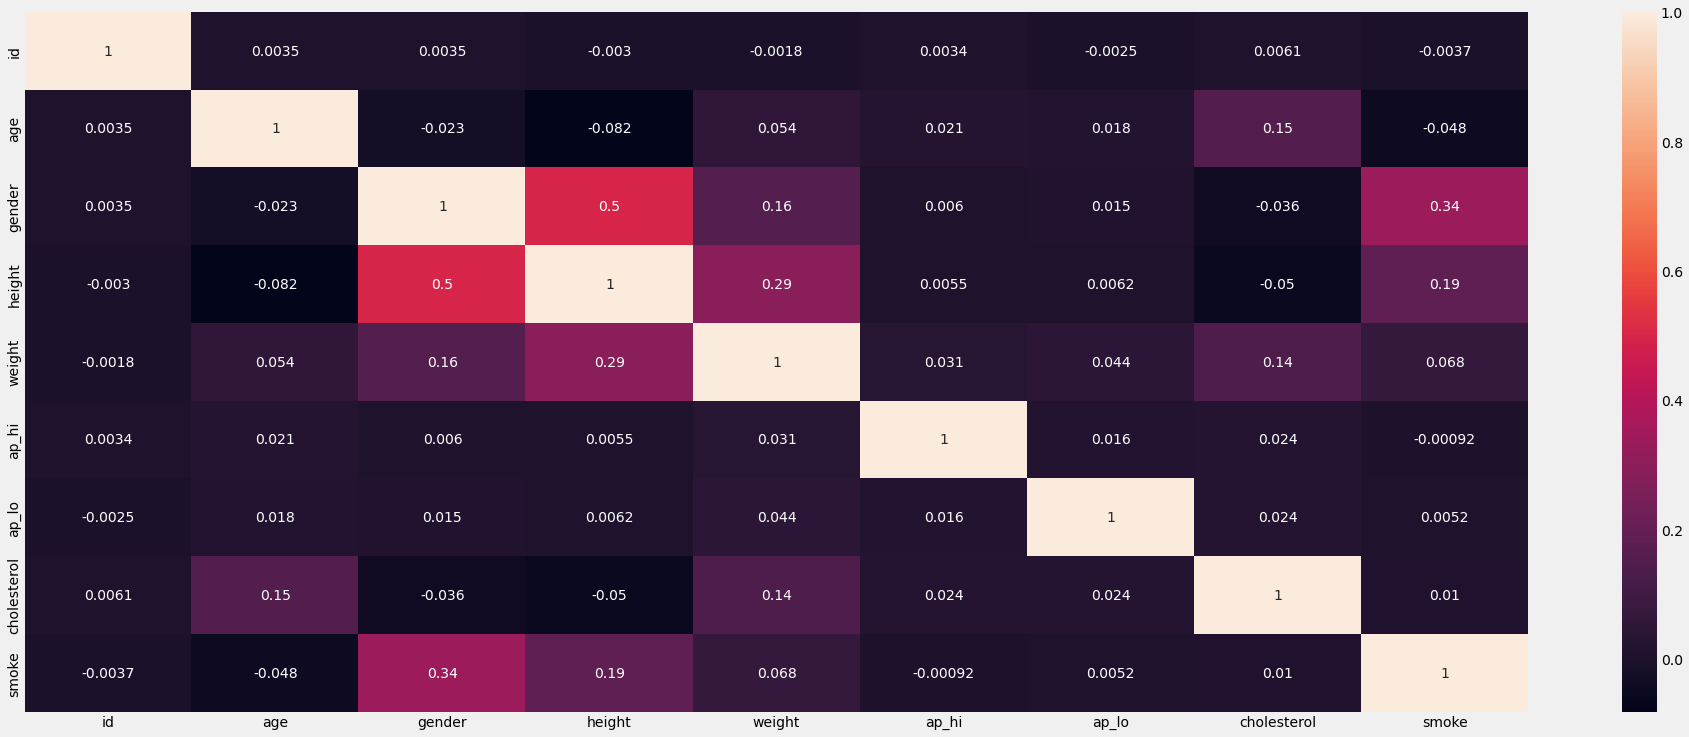

In [ ]:
# Heatmap plot for base dataset
plt.figure(figsize=(30, 12))
vg_corr = base.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

## Heatmap plot for "Data" dataset

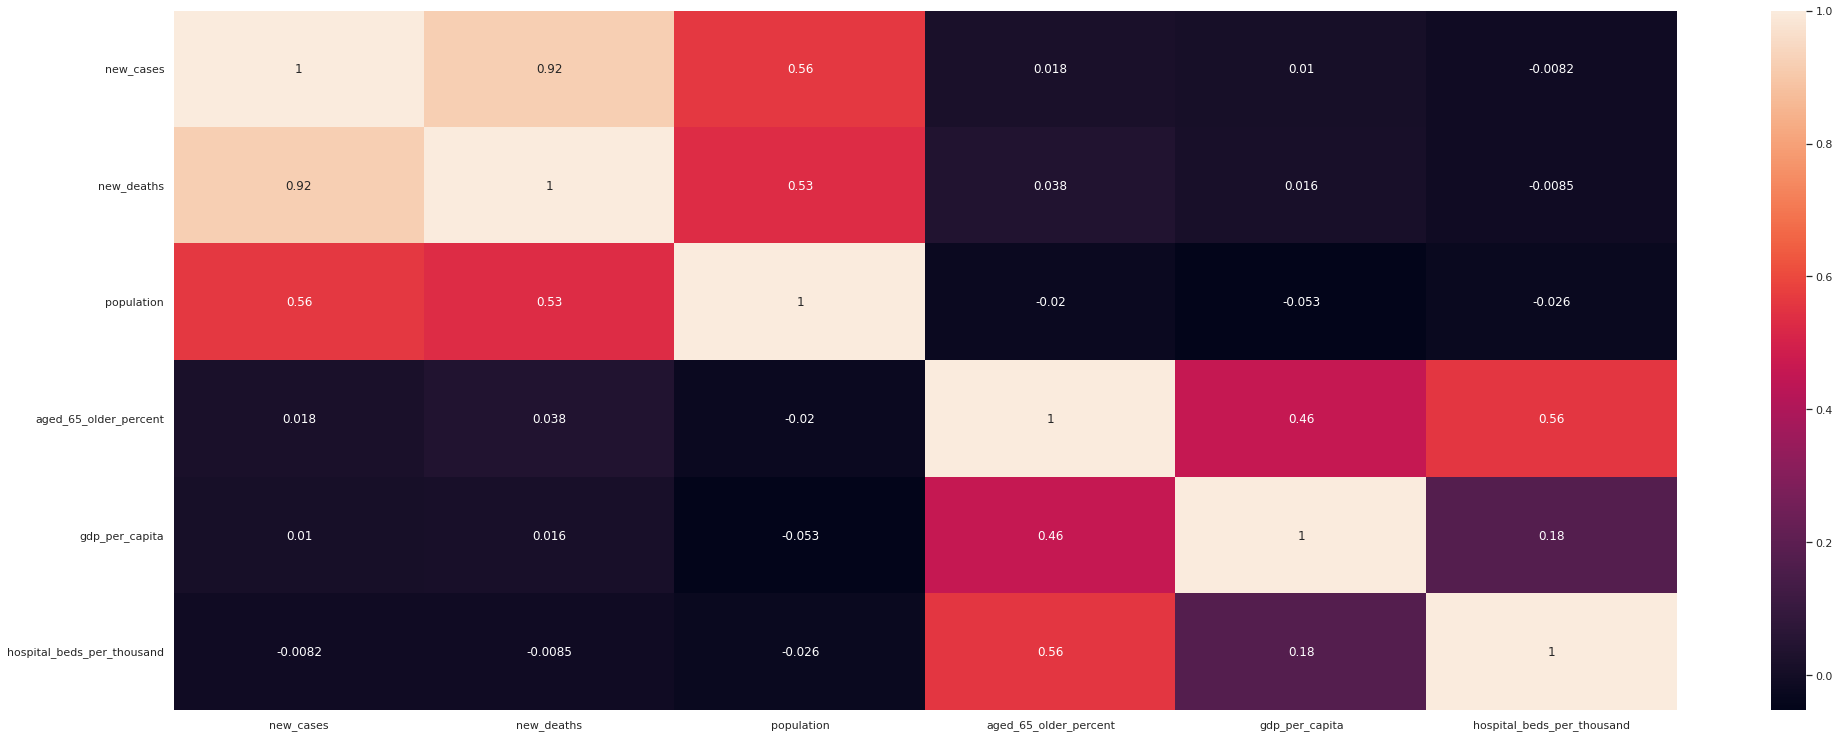

In [ ]:
# Heatmap plot for "Data" dataset
plt.figure(figsize=(30, 12))
vg_corr = data.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

# EXPLORATORY DATA ANALYSIS

In [ ]:
data.columns

Index(['location', 'date', 'new_cases', 'new_deaths', 'population',
       'aged_65_older_percent', 'gdp_per_capita',
       'hospital_beds_per_thousand'],
      dtype='object')

In [ ]:
data.sort_values(by='new_deaths', ascending=False)

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
22962,World,2020-04-16,79748,10520,7.794799e+09,8.696,15469.207,2.705
22963,World,2020-04-17,82962,8709,7.794799e+09,8.696,15469.207,2.705
22964,World,2020-04-18,81894,8568,7.794799e+09,8.696,15469.207,2.705
22954,World,2020-04-08,74990,7663,7.794799e+09,8.696,15469.207,2.705
22961,World,2020-04-15,76602,7604,7.794799e+09,8.696,15469.207,2.705
...,...,...,...,...,...,...,...,...
8990,Guinea-Bissau,2020-06-07,0,0,1.967998e+06,3.002,1548.675,0.300
8987,Guinea-Bissau,2020-06-04,0,0,1.967998e+06,3.002,1548.675,0.300
11541,Kosovo,2020-06-01,0,0,1.932774e+06,2.686,9795.834,1.400
16292,Panama,2020-06-03,258,-86,4.314768e+06,7.918,22267.037,2.300


## What percentage of the population over 50 consume alcohol

In [ ]:
alco_base = pd.merge(alco, base, on='id')
alco_base.head()

,id,alco,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,44,0,14605,1,159,60.0,110,70,1,0
1,45,0,20652,1,160,73.0,130,85,1,0
2,46,0,21940,2,173,82.0,140,90,3,0
3,47,0,20404,1,163,55.0,120,80,1,0
4,49,0,18328,2,175,95.0,120,80,1,0


In [ ]:
alcohol = alco_base[alco_base.alco == 0]
alcohol

In [ ]:
alcohol1 = alcohol[alcohol.gender >=50]
alcohol1

,id,alco,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke


## Which two features have the highest spearman rank correlation.

## What percentage of people have more than 2 standard deviations far from average height?

In [ ]:
base.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'smoke'],
      dtype='object')

## How much heavier is the age group with the highest average weight than the age group with the lowest weight?

In [ ]:
max_x = base.loc[base['weight'].idxmax()]
max_x

id               618.0
age            16765.0
gender             1.0
height           186.0
weight           200.0
ap_hi            130.0
ap_lo             70.0
cholesterol        1.0
smoke              0.0
Name: 435, dtype: float64

In [ ]:
min_x = base.loc[base['weight'].idxmin()]
min_x

id             82567.0
age            18804.0
gender             2.0
height           165.0
weight            10.0
ap_hi            180.0
ap_lo           1100.0
cholesterol        2.0
smoke              0.0
Name: 57858, dtype: float64

In [ ]:
# Create a dataset with Germany location
germany = data[data.location == "Germany"]
germany.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
7914,Germany,2019-12-31,0,0,83783945.0,21.453,45229.245,8.0
7915,Germany,2020-01-01,0,0,83783945.0,21.453,45229.245,8.0
7916,Germany,2020-01-02,0,0,83783945.0,21.453,45229.245,8.0
7917,Germany,2020-01-03,0,0,83783945.0,21.453,45229.245,8.0
7918,Germany,2020-01-04,0,0,83783945.0,21.453,45229.245,8.0


In [ ]:
base1 = base[base.age >= 50]
base1

In [ ]:
max_1 = base1.loc[base1['cholesterol'].idxmax()]
max_1

id                 1.0
age            20228.0
gender             1.0
height           156.0
weight            85.0
ap_hi            140.0
ap_lo             90.0
cholesterol        3.0
smoke              0.0
Name: 1, dtype: float64

In [ ]:
B2 = base[base.age < 50]
B2

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke


In [ ]:
max_2 = base2.loc[base2['cholesterol'].idxmax()] 
max_2 

In [ ]:
# Create a dataset with Italy location
italy = data[data.location == "Italy"]
italy.head()

In [ ]:
# the cumulative sum of the elements along the given axis(Germany new cases)
germany["cumsum"] = germany.new_cases.cumsum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# the cumulative sum of the elements along the given axis(Italy new cases)
italy["cumsum"] = italy.new_cases.cumsum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## When did the diff in total number of confirmed cases between Italy and German become more than 10,000

In [ ]:
# merge the two dataset on the column 'date'
german_italy = pd.merge(germany, italy, on='date')

In [ ]:
german_italy[abs(german_italy.cumsum_x - german_italy.cumsum_y) > 10000]

,location_x,date,new_cases_x,new_deaths_x,population_x,aged_65_older_percent_x,gdp_per_capita_x,hospital_beds_per_thousand_x,cumsum_x,location_y,new_cases_y,new_deaths_y,population_y,aged_65_older_percent_y,gdp_per_capita_y,hospital_beds_per_thousand_y,cumsum_y
72,Germany,2020-03-12,271,1,83783945.0,21.453,45229.245,8.0,1567,Italy,2313,196,60461828.0,23.021,35220.084,3.18,12462
73,Germany,2020-03-13,802,2,83783945.0,21.453,45229.245,8.0,2369,Italy,2651,189,60461828.0,23.021,35220.084,3.18,15113
74,Germany,2020-03-14,693,0,83783945.0,21.453,45229.245,8.0,3062,Italy,2547,252,60461828.0,23.021,35220.084,3.18,17660
75,Germany,2020-03-15,733,3,83783945.0,21.453,45229.245,8.0,3795,Italy,3497,173,60461828.0,23.021,35220.084,3.18,21157
76,Germany,2020-03-16,1043,4,83783945.0,21.453,45229.245,8.0,4838,Italy,2823,370,60461828.0,23.021,35220.084,3.18,23980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Germany,2020-06-06,407,33,83783945.0,21.453,45229.245,8.0,183678,Italy,518,85,60461828.0,23.021,35220.084,3.18,234531
159,Germany,2020-06-07,301,22,83783945.0,21.453,45229.245,8.0,183979,Italy,270,72,60461828.0,23.021,35220.084,3.18,234801
160,Germany,2020-06-08,214,6,83783945.0,21.453,45229.245,8.0,184193,Italy,197,53,60461828.0,23.021,35220.084,3.18,234998
161,Germany,2020-06-09,350,37,83783945.0,21.453,45229.245,8.0,184543,Italy,280,65,60461828.0,23.021,35220.084,3.18,235278


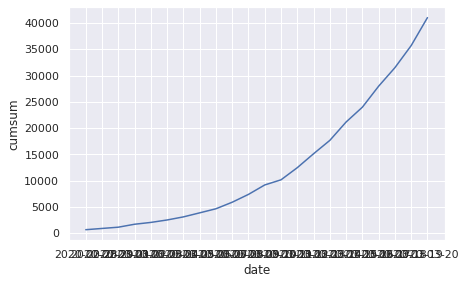

In [ ]:

sns.lineplot(data=italy[(italy.date >= "2020-02-28") & (italy.date <= "2020-03-20")], x = 'date', y='cumsum')

In [ ]:
italy[italy.date == "2020-02-28"]["cumsum"] - italy[italy.date == "2020-03-20"].new_cases

10747   NaN
10768   NaN
dtype: float64

In [ ]:
# Sum of new deaths groupby Location
deaths= data.groupby('location').new_deaths.sum().sort_values(ascending=False)
deaths.head()

location
World             411195
United States     112006
United Kingdom     40883
Brazil             38406
Italy              34043
Name: new_deaths, dtype: int64

In [ ]:
l_beds = data[data.hospital_beds_per_thousand >= 5]
h_gdp = l_beds[l_beds.gdp_per_capita > 10000]

In [ ]:
len(h_gdp)/len(l_beds)

0.8350463775382301